In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
from tensorflow import keras
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame
from scipy.signal import savgol_filter

In [113]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
data_x = FLT_1.iloc[:,0:7]
data_y = FLT_1.iloc[:,7:10]

y1 = data_y['Cd'].to_numpy()
y2 = data_y['Cl'].to_numpy()
y3 = data_y['Cm'].to_numpy()

y1 = savgol_filter(y1,window_length=8000, polyorder=4)
y2 = savgol_filter(y2,window_length=4000, polyorder=4)
y3 = savgol_filter(y3,window_length=4000, polyorder=4)

data_y = {'Cd':y1,
          'Cl':y2,
          'Cm':y3}

data_y = pd.DataFrame(data_y)



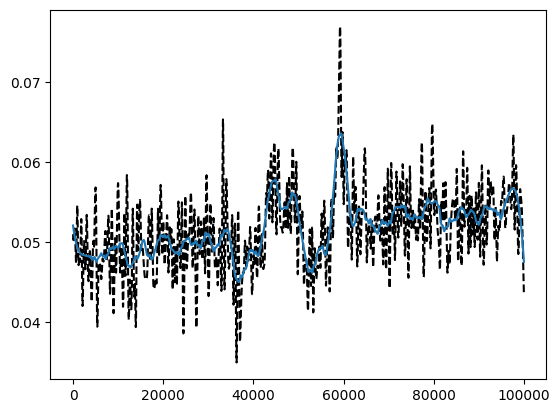

In [114]:
plt.plot(FLT_1['Cd'], 'k--')
plt.plot(data_y['Cd'])

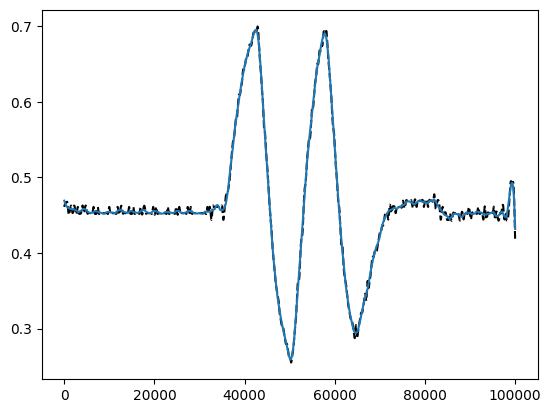

In [115]:
plt.plot(FLT_1['Cl'], 'k--')
plt.plot(data_y['Cl'])


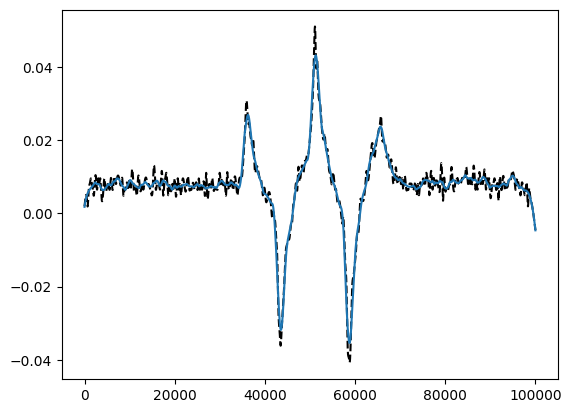

In [116]:
plt.plot(FLT_1['Cm'], 'k--')
plt.plot(data_y['Cm'])


In [117]:
x = data_x[0:(len(data_x)-1)]
y = data_y[1:(len(data_y))]


from sklearn.model_selection import train_test_split
x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

x_test = DataFrame.sort_index(x_test, ignore_index= True)
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True)
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True)
y_training = DataFrame.sort_index(y_training, ignore_index= True)

x_test = x_test[0:len(x_test)].to_numpy()
y_test = y_test[0:len(y_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()


(10000, 7)
(10000, 3)
(10000, 7)
(10000, 3)
(79999, 7)
(79999, 3)


In [123]:

model = keras.Sequential([
    keras.layers.Dense(7 , input_shape= (7,)),
    keras.layers.Dense(8 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0479 - root_mean_squared_error: 0.2188 - val_loss: 2.1321e-04 - val_root_mean_squared_error: 0.0146
Epoch 2/1000
800/800 [==============================] - 1s 1ms/step - loss: 1.8013e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.6159e-04 - val_root_mean_squared_error: 0.0127
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 1.5022e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.3644e-04 - val_root_mean_squared_error: 0.0117
Epoch 4/1000
800/800 [==============================] - 1s 1ms/step - loss: 1.2995e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.2084e-04 - val_root_mean_squared_error: 0.0110
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 1.1227e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.0071e-04 - val_root_mean_squared_error: 0.0100
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 9.6365e-05 - root_

In [124]:
model_2 = keras.Sequential([
    keras.layers.Dense(7 , input_shape= (7,)),
    keras.layers.Dense(8 ,activation = "tanh"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model_2.summary()



Epoch 1/1000
800/800 [==============================] - 2s 1ms/step - loss: 0.0845 - root_mean_squared_error: 0.2907 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0509
Epoch 2/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0023 - root_mean_squared_error: 0.0482 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0021 - root_mean_squared_error: 0.0453 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 4/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0394
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 9.1536e-04 - val_root_mean_squared_error: 0.0303
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 6.1346e-04 - root_mean_squared_error: 0.0248 - val

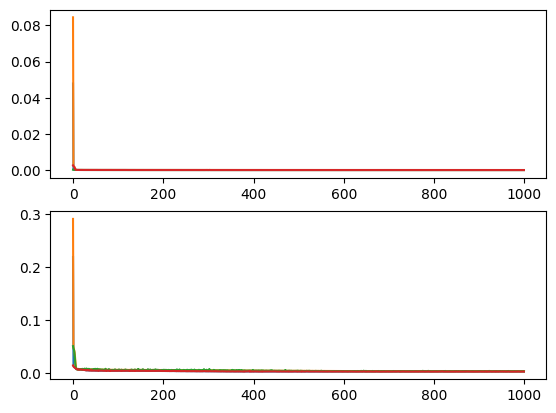

In [125]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'])
ax[0].plot(history_2.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].plot(history_2.history['val_loss'])

ax[1].plot(history.history['root_mean_squared_error'])
ax[1].plot(history_2.history['root_mean_squared_error'])

ax[1].plot(history_2.history['val_root_mean_squared_error'])
ax[1].plot(history.history['val_root_mean_squared_error'])



In [126]:
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [147]:
FLT_1_Sigmoid = DataFrame(y_pred, columns=['Cd','Cl','Cm'])

In [146]:
FLT_1_Tanh = DataFrame(y_pred_2, columns=['cd','cl','cm'])

R-square sigmoid: 0.8441915296017782
R-square tanh: 0.8625919743467152


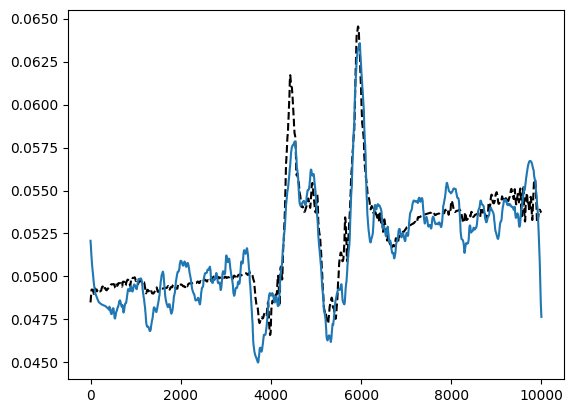

In [158]:
plt.plot(y_pred[:,0], 'k--')
plt.plot(y_test[:,0])
print('R-square sigmoid:',r2_score(y_test[:,0], y_pred[:,0]))
print('R-square tanh:',r2_score(y_test[:,0], y_pred_2[:,0]))


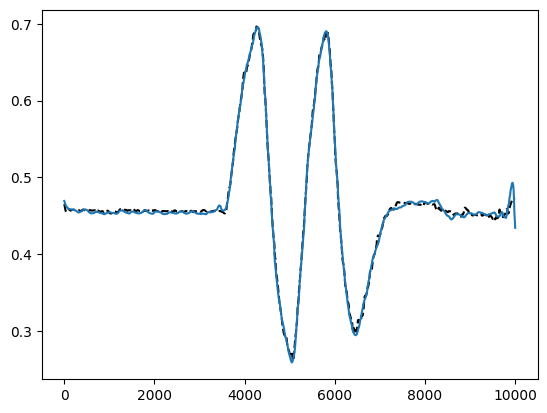

In [156]:
plt.plot(y_pred[:,1], 'k--')
plt.plot(y_test[:,1])


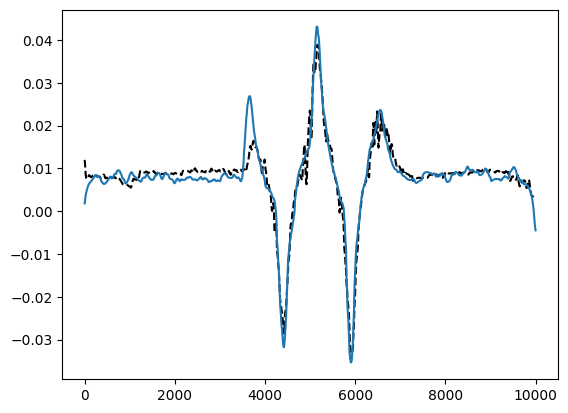

In [157]:
plt.plot(y_pred[:,2], 'k--')
plt.plot(y_test[:,2])

In [150]:
print('R-square sigmoid:',r2_score(y_test, y_pred))
print('R-square tanh:',r2_score(y_test, y_pred_2))


R-square sigmoid: 0.9233023326234155
R-square tanh: 0.9299712045731119
